# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
metadata_study_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how="left")

# Display the data table for preview
metadata_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [39]:
# Checking the number of mice.
num_of_mice = metadata_study_df['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {num_of_mice}")

Number of unique mice IDs: 249


In [40]:
duplicate_timepoints = metadata_study_df[metadata_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_timepoints

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
metadata_study_clean_df = metadata_study_df.drop_duplicates(['Mouse ID', 'Timepoint'])
metadata_study_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [42]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mice = metadata_study_clean_df['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {updated_unique_mice}")

Number of unique mice IDs: 249


## Summary Statistics

In [58]:
summary_df = metadata_study_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'number of rows for each drug regimen'}, xlabel='Drug Regimen'>

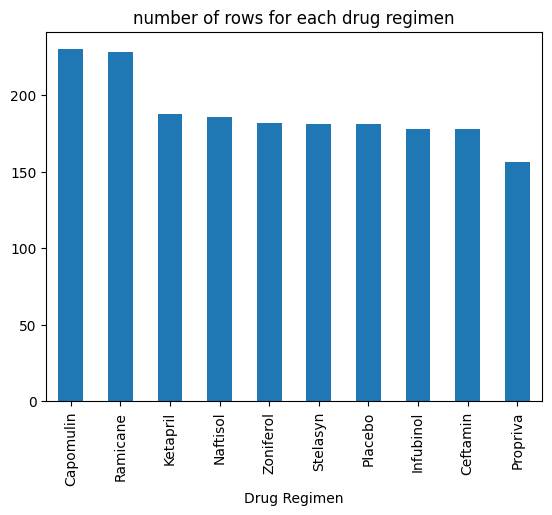

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart = metadata_study_clean_df['Drug Regimen'].value_counts().plot(kind='bar',title='number of rows for each drug regimen')
bar_chart

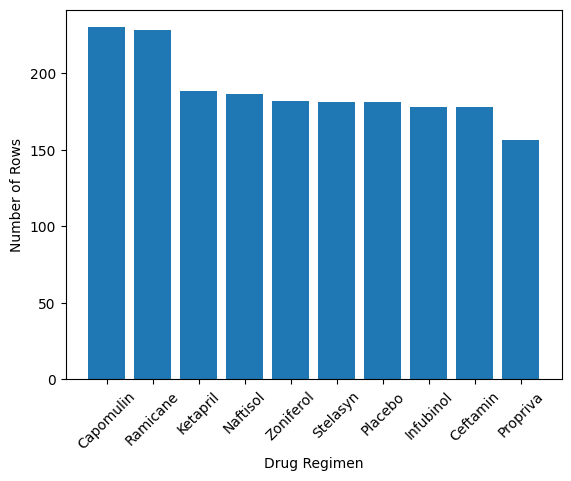

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart_matplotlib = metadata_study_clean_df['Drug Regimen'].value_counts()
plt.bar(bar_chart_matplotlib.index, bar_chart_matplotlib.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

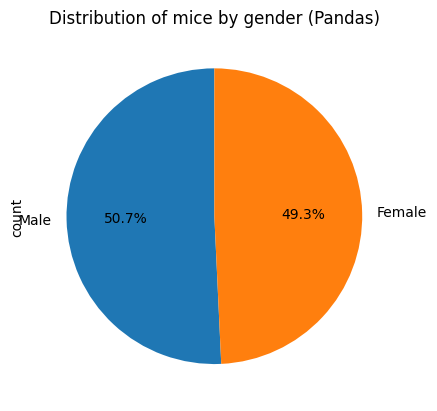

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_pandas = metadata_study_clean_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Distribution of mice by gender (Pandas)')
plt.show()

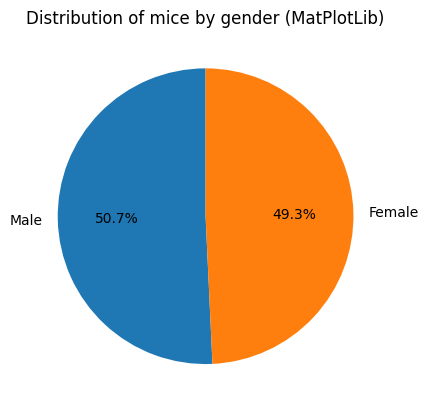

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart_matplotlib = metadata_study_clean_df['Sex'].value_counts()
plt.pie(pie_chart_matplotlib,labels=pie_chart_matplotlib.index,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of mice by gender (MatPlotLib)')
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = metadata_study_clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(final_tumor_volume, metadata_study_clean_df, on=["Mouse ID", "Timepoint"])
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Ceftamin', 'Ramicane', 'Infubinol','Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    vol_data.append(final_tumor_volume[final_tumor_volume['Drug Regimen']==drug]['Tumor Volume (mm3)'])

    # Determine outliers using upper and lower bounds
for i in range(len(treatments)):
    quartiles = vol_data[i].quantile([0.25,0.5,0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = vol_data[i][(vol_data[i] < lower_bound) | (vol_data[i] > upper_bound)]
    print(f'Potential outliers for {treatments[i]}: {outliers}')

Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)


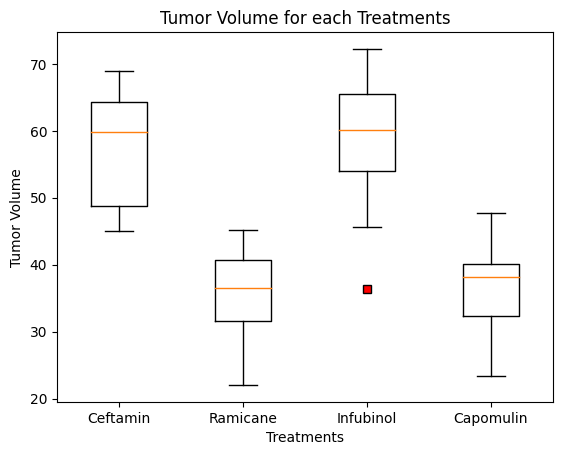

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='s'))
plt.title("Tumor Volume for each Treatments")
plt.xlabel("Treatments")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

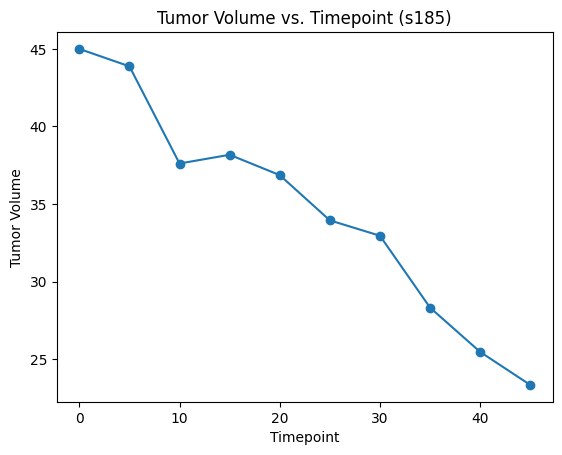

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = metadata_study_clean_df[(metadata_study_clean_df['Drug Regimen']=='Capomulin') & (metadata_study_clean_df['Mouse ID']=='s185')]
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs. Timepoint (s185)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

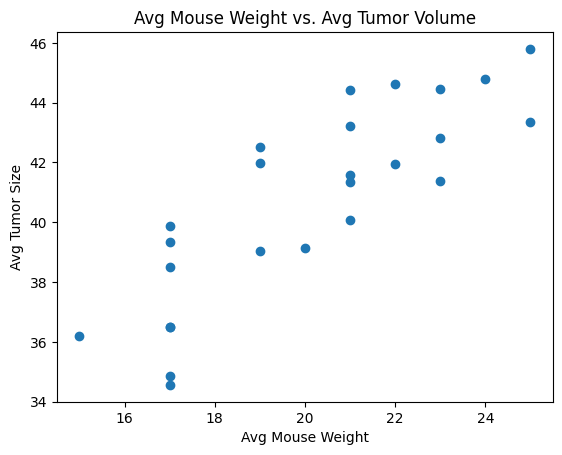

In [79]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_cap_mouse = metadata_study_clean_df[metadata_study_clean_df['Drug Regimen']=='Capomulin']
avg_tumor_vol = scatter_cap_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_mouse_weight = scatter_cap_mouse.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(avg_mouse_weight,avg_tumor_vol)
plt.title('Avg Mouse Weight vs. Avg Tumor Volume')
plt.xlabel('Avg Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.show()

## Correlation and Regression

Correlation between mouse weight and average tumor volume: 0.841936342469472


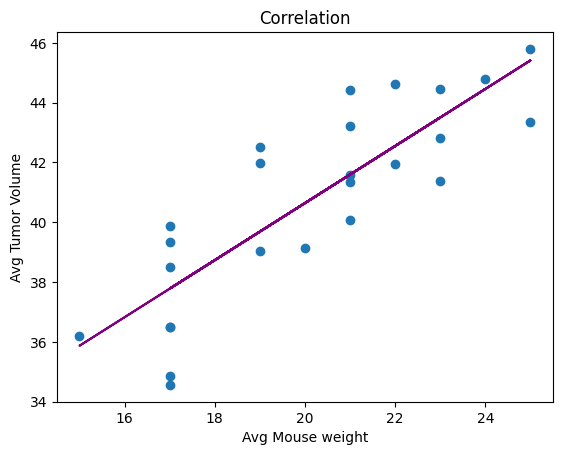

In [82]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_mouse_weight, avg_tumor_vol)
print(f"Correlation between mouse weight and average tumor volume: {correlation[0]}")

slope, intercept, r_value, p_value, std_err = st.linregress(avg_mouse_weight, avg_tumor_vol)
plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.plot(avg_mouse_weight, slope * avg_mouse_weight + intercept, color='purple')
plt.title('Correlation')
plt.xlabel('Avg Mouse weight')
plt.ylabel('Avg Tumor Volume')
plt.show()